<a href="https://colab.research.google.com/github/anqitu/NTUOSS-AlgorithmicTradingWorkshop/blob/master/completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1 - Set Up

#### 1.1 Import Necessary Libraries

In [0]:
# TASK 1.1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### 1.2 Import Financial Data

In [0]:
# TASK 1.2: Import Apple's stock market price from 2006 to 2019
import pandas_datareader as pdr
import datetime 
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2019, 1, 1))


## Task 2 - Work with Pandas Dataframe

#### 2.1 Check Data

In [3]:
# Task 2.1.1 Check the structure of a Pandas Dataframe
print(aapl)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2006-10-02   10.838572   10.614285   10.728572   10.694285  178159800.0   
2006-10-03   10.707143   10.455714   10.635715   10.582857  197677200.0   
2006-10-04   10.780000   10.451428   10.585714   10.768572  207270700.0   
2006-10-05   10.880000   10.590000   10.647142   10.690000  170970800.0   
2006-10-06   10.720000   10.544286   10.631429   10.602858  116739700.0   
2006-10-09   10.725715   10.504286   10.542857   10.661428  109555600.0   
2006-10-10   10.654285   10.440000   10.648571   10.544286  132897100.0   
2006-10-11   10.568571   10.371428   10.488571   10.461429  142963800.0   
2006-10-12   10.770000   10.514286   10.515715   10.751429  148213800.0   
2006-10-13   10.982857   10.677143   10.804286   10.717143  171049200.0   
2006-10-16   10.840000   10.684286   10.741428   10.771428  127173200.0   
2006-10-17   10.752857   

In [4]:
# Task 2.1.2 Use the describe() function to get some useful summary statistics about your data
print(aapl.describe(include = 'all'))

              High          Low         Open        Close        Volume  \
count  3083.000000  3083.000000  3083.000000  3083.000000  3.083000e+03   
mean     78.870802    77.381328    78.153688    78.141460  1.173241e+08   
std      53.991091    53.147375    53.567526    53.572490  9.818531e+07   
min      10.568571    10.371428    10.488571    10.461429  1.147590e+07   
25%      28.022857    27.292857    27.703571    27.724999  4.312070e+07   
50%      72.532860    71.328575    71.941429    71.765717  9.132870e+07   
75%     113.350002   111.334999   112.260002   112.420002  1.594366e+08   
max     233.470001   229.779999   230.779999   232.070007  8.432424e+08   

         Adj Close  
count  3083.000000  
mean     68.800625  
std      55.892967  
min       7.005628  
25%      18.566401  
50%      53.695484  
75%     106.782024  
max     231.263092  


In [5]:
# Task 2.1.3 Check the general information of the dataframe
print(aapl.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3083 entries, 2006-10-02 to 2018-12-31
Data columns (total 6 columns):
High         3083 non-null float64
Low          3083 non-null float64
Open         3083 non-null float64
Close        3083 non-null float64
Volume       3083 non-null float64
Adj Close    3083 non-null float64
dtypes: float64(6)
memory usage: 168.6 KB
None


In [6]:
# Task 2.1.4 Check the shape, columns and index of a Pandas Dataframe
print(aapl.shape)
print(aapl.columns)
print(aapl.index)

(3083, 6)
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')
DatetimeIndex(['2006-10-02', '2006-10-03', '2006-10-04', '2006-10-05',
               '2006-10-06', '2006-10-09', '2006-10-10', '2006-10-11',
               '2006-10-12', '2006-10-13',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=3083, freq=None)


In [7]:
# Task 2.1.5 Check first few rows of dataframe
print(aapl.head())

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2006-10-02  10.838572  10.614285  10.728572  10.694285  178159800.0   7.161565
2006-10-03  10.707143  10.455714  10.635715  10.582857  197677200.0   7.086947
2006-10-04  10.780000  10.451428  10.585714  10.768572  207270700.0   7.211311
2006-10-05  10.880000  10.590000  10.647142  10.690000  170970800.0   7.158698
2006-10-06  10.720000  10.544286  10.631429  10.602858  116739700.0   7.100338


In [8]:
# Task 2.1.6 Check last 10 rows of dataframe
print(aapl.tail(10))

                  High         Low        Open       Close      Volume  \
Date                                                                     
2018-12-17  168.350006  162.729996  165.449997  163.940002  44287900.0   
2018-12-18  167.529999  164.389999  165.380005  166.070007  33841500.0   
2018-12-19  167.449997  159.089996  166.000000  160.889999  49047300.0   
2018-12-20  162.110001  155.300003  160.399994  156.830002  64773000.0   
2018-12-21  158.160004  149.630005  156.860001  150.729996  95744600.0   
2018-12-24  151.550003  146.589996  148.149994  146.830002  37169200.0   
2018-12-26  157.229996  146.720001  148.300003  157.169998  58582500.0   
2018-12-27  156.770004  150.070007  155.839996  156.149994  53117100.0   
2018-12-28  158.520004  154.550003  157.500000  156.229996  42291400.0   
2018-12-31  159.360001  156.479996  158.529999  157.740005  35003500.0   

             Adj Close  
Date                    
2018-12-17  163.940002  
2018-12-18  166.070007  
2018-12-19 

In [9]:
# Task 2.1.7 Check the existence of null values
print(aapl.isnull().sum())

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64


#### 2.2 Clean Data

In [0]:
# Task 2.2.1 Drop a column
aapl = aapl.drop(columns = ['High', 'Low'])

In [11]:
# Check the column has been dropped
print(aapl.head())

                 Open      Close       Volume  Adj Close
Date                                                    
2006-10-02  10.728572  10.694285  178159800.0   7.161565
2006-10-03  10.635715  10.582857  197677200.0   7.086947
2006-10-04  10.585714  10.768572  207270700.0   7.211311
2006-10-05  10.647142  10.690000  170970800.0   7.158698
2006-10-06  10.631429  10.602858  116739700.0   7.100338


In [0]:
# Task 2.2.2 Keep wanted columns
aapl = aapl[['Close', 'Adj Close']]

In [13]:
print(aapl.head())

                Close  Adj Close
Date                            
2006-10-02  10.694285   7.161565
2006-10-03  10.582857   7.086947
2006-10-04  10.768572   7.211311
2006-10-05  10.690000   7.158698
2006-10-06  10.602858   7.100338


## Task 3 - Visualize Data (Exploratory Data Analysis)

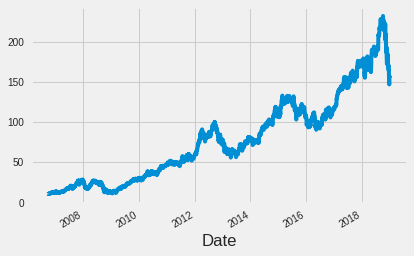

In [14]:
# Task 3.1 Plot the closing price
aapl['Close'].plot()

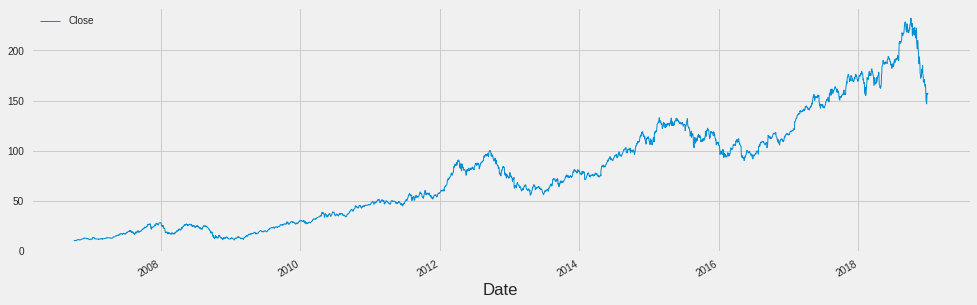

In [15]:
# Task 3.2 Plot the closing price with some nice adjustments
aapl['Close'].plot(figsize = (15,5), linewidth = 1, legend = True)

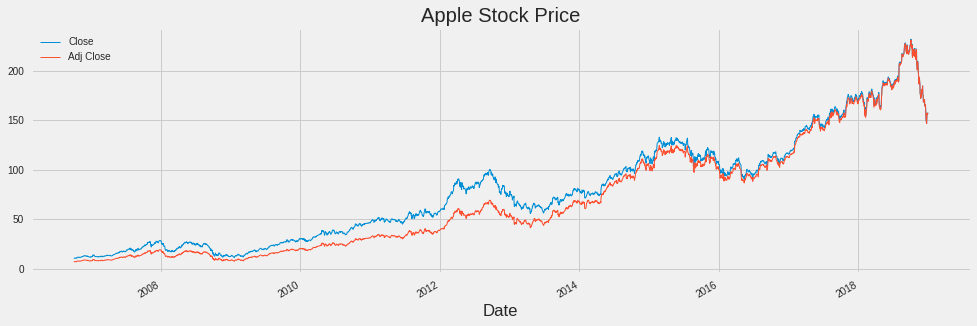

In [16]:
# Task 3.2 Plot the closing and adjusted closing prices
aapl['Close'].plot(figsize = (15,5), linewidth = 1, legend = True)
aapl['Adj Close'].plot(figsize = (15,5), linewidth = 1, legend = True)
plt.legend(['Close', 'Adj Close'])
plt.title('Apple Stock Price')
plt.show()

## Task 4 - Build Your Trading Strategy

In [0]:
# Task 4.1 Initialize the short and long windows
short_window = 50
long_window = 100

In [0]:
# Task 4.2 Create moving averages over the short window
aapl['short_ma'] = aapl['Close'].rolling(window = short_window, min_periods = 1).mean()
aapl['long_ma'] = aapl['Close'].rolling(window = long_window, min_periods = 1).mean()

In [19]:
# Check the dataframe
aapl

,Close,Adj Close,short_ma,long_ma
Date,,,,
2006-10-02,10.694285,7.161565,10.694285,10.694285
2006-10-03,10.582857,7.086947,10.638571,10.638571
2006-10-04,10.768572,7.211311,10.681905,10.681905
2006-10-05,10.690000,7.158698,10.683928,10.683928
2006-10-06,10.602858,7.100338,10.667714,10.667714
2006-10-09,10.661428,7.139562,10.666667,10.666667
2006-10-10,10.544286,7.061115,10.649184,10.649184
2006-10-11,10.461429,7.005628,10.625714,10.625714
2006-10-12,10.751429,7.199831,10.639683,10.639683


In [0]:
# Task 4.3 Initilize as 0
aapl['higher_short_ma'] = 0

In [0]:
# Task 4.4 Set 1 for rows where short_ma is higher
aapl['higher_short_ma'][short_window:] = np.where(aapl['short_ma'][short_window:] > aapl['long_ma'][short_window:], 1, 0)   

In [22]:
# Task 4.5 Print rows where higher_short_ma is of value 1
aapl[aapl['higher_short_ma'] == 1]

,Close,Adj Close,short_ma,long_ma,higher_short_ma
Date,,,,,
2006-12-12,12.305715,8.240680,11.793943,11.772381,1
2006-12-13,12.721429,8.519068,11.836714,11.790632,1
2006-12-14,12.650000,8.471235,11.874343,11.806846,1
2006-12-15,12.531428,8.391831,11.911171,11.820265,1
2006-12-18,12.210000,8.176582,11.943314,11.827351,1
2006-12-19,12.330000,8.256943,11.976686,11.836327,1
2006-12-20,12.108571,8.108658,12.007971,11.841103,1
2006-12-21,11.842857,7.930720,12.035600,11.841133,1
2006-12-22,11.742857,7.863753,12.055429,11.839467,1


In [0]:
# Task 4.6 Generate trading signals
aapl['Signal'] = aapl['higher_short_ma'].diff()

In [24]:
# Check days when there is a trading signal
aapl[aapl['Signal'] != 0]

,Close,Adj Close,short_ma,long_ma,higher_short_ma,Signal
Date,,,,,,
2006-10-02,10.694285,7.161565,10.694285,10.694285,0,NaN
2006-12-12,12.305715,8.240680,11.793943,11.772381,1,1.0
2008-02-11,18.492857,12.383977,24.107086,24.111229,0,-1.0
2008-05-13,27.137142,18.172733,21.818286,21.696571,1,1.0
2008-08-18,25.055714,16.778877,24.385200,24.447329,0,-1.0
2009-03-26,15.695714,10.510836,13.321571,13.282829,1,1.0
2010-08-31,34.728573,23.256433,36.398800,36.421814,0,-1.0
2010-09-21,40.538570,27.147177,36.680229,36.644743,1,1.0
2011-05-18,48.552856,32.514038,48.990314,49.057786,0,-1.0


In [25]:
# Check the data in December of 2006 when buying happens
aapl['2006-12':].head(15)

,Close,Adj Close,short_ma,long_ma,higher_short_ma,Signal
Date,,,,,,
2006-12-01,13.045714,8.736231,11.624448,11.624448,0,0.0
2006-12-04,13.017143,8.717095,11.655397,11.655397,0,0.0
2006-12-05,13.038571,8.731448,11.685466,11.685466,0,0.0
2006-12-06,12.832857,8.593687,11.709878,11.709878,0,0.0
2006-12-07,12.434286,8.326779,11.724970,11.724970,0,0.0
2006-12-08,12.608571,8.443489,11.743003,11.743003,0,0.0
2006-12-11,12.678572,8.490370,11.761714,11.761714,0,0.0
2006-12-12,12.305715,8.240680,11.793943,11.772381,1,1.0
2006-12-13,12.721429,8.519068,11.836714,11.790632,1,0.0


In [26]:
# Check the data in February of 2008 when selling happens
aapl['2008-02':].head(15)

,Close,Adj Close,short_ma,long_ma,higher_short_ma,Signal
Date,,,,,,
2008-02-01,19.107143,12.795344,24.899200,24.209086,1,0.0
2008-02-04,18.807142,12.594442,24.792914,24.203600,1,0.0
2008-02-05,18.480000,12.375367,24.681200,24.192900,1,0.0
2008-02-06,17.428572,11.671264,24.539657,24.171186,1,0.0
2008-02-07,17.320000,11.598562,24.393086,24.146086,1,0.0
2008-02-08,17.925714,12.004183,24.252143,24.127614,1,0.0
2008-02-11,18.492857,12.383977,24.107086,24.111229,0,-1.0
2008-02-12,17.837143,11.944873,23.937286,24.088500,0,0.0
2008-02-13,18.485714,12.379197,23.786371,24.072914,0,0.0


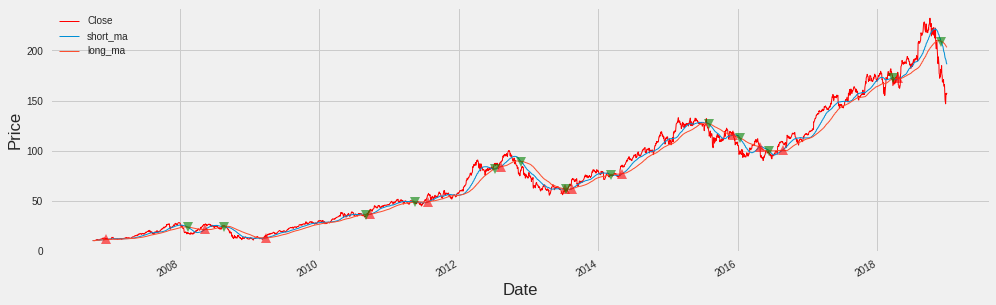

In [27]:
## Task 4.6 plot the short and long moving averages, together with the buy and sell signals

# Initialize the plot figure
fig = plt.figure(figsize = (15,5))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price')

# Plot the closing price
aapl['Close'].plot(ax = ax1, color = 'r', linewidth = 1, legend = True)

# Plot the short and long moving averages
aapl[['short_ma', 'long_ma']].plot(ax = ax1, linewidth = 1, legend = True)

# Plot the buy signals
ax1.plot(aapl[aapl['Signal'] == 1].index, 
         aapl[aapl['Signal'] == 1]['short_ma'], 
         '^', markersize = 10, color = 'r', alpha = 0.6)
         
# Plot the sell signals
ax1.plot(aapl[aapl['Signal'] == -1].index, 
         aapl[aapl['Signal'] == -1]['short_ma'],
         'v', markersize = 10, color = 'g', alpha = 0.6)
         
# Show the plot
plt.show()

## Task 5 - Test Your Strategy

In [0]:
# Task 5.1 Imagine you have 1 million
initial_capital= 1000000

In [0]:
# Task 5.2 Buy or Sell a 5k shares on the days that the signal is 1 or -1
aapl['Order'] = 5000 * aapl['Signal']

In [0]:
# Task 5.3 Calculate the transaction price paying (buy stocks) or receiving (sell stocks)
aapl['Transaction'] = aapl['Order'].multiply(aapl['Adj Close'], axis=0)

In [31]:
# Check data
aapl[aapl['Transaction'] != 0]

,Close,Adj Close,short_ma,long_ma,higher_short_ma,Signal,Order,Transaction
Date,,,,,,,,
2006-10-02,10.694285,7.161565,10.694285,10.694285,0,NaN,NaN,NaN
2006-12-12,12.305715,8.240680,11.793943,11.772381,1,1.0,5000.0,41203.398705
2008-02-11,18.492857,12.383977,24.107086,24.111229,0,-1.0,-5000.0,-61919.884682
2008-05-13,27.137142,18.172733,21.818286,21.696571,1,1.0,5000.0,90863.666534
2008-08-18,25.055714,16.778877,24.385200,24.447329,0,-1.0,-5000.0,-83894.386292
2009-03-26,15.695714,10.510836,13.321571,13.282829,1,1.0,5000.0,52554.178238
2010-08-31,34.728573,23.256433,36.398800,36.421814,0,-1.0,-5000.0,-116282.167435
2010-09-21,40.538570,27.147177,36.680229,36.644743,1,1.0,5000.0,135735.883713
2011-05-18,48.552856,32.514038,48.990314,49.057786,0,-1.0,-5000.0,-162570.190430


In [0]:
# Task 5.4 Calculate the number in shares owned 
aapl['Shares'] = aapl['Order'].cumsum()

In [0]:
# Task 5.5 Calculate the value of shares owned 
aapl['Holdings'] = aapl['Shares'].multiply(aapl['Adj Close'], axis=0)

In [0]:
# Task 5.6 Calculate the value of cash owned 
aapl['Cash'] = initial_capital - (aapl['Transaction']).cumsum()   

In [35]:
# Check the data in December of 2006 when buying happens
aapl['2006-12':].head(15)

,Close,Adj Close,short_ma,long_ma,higher_short_ma,Signal,Order,Transaction,Shares,Holdings,Cash
Date,,,,,,,,,,,
2006-12-01,13.045714,8.736231,11.624448,11.624448,0,0.0,0.0,0.000000,0.0,0.000000,1000000.000000
2006-12-04,13.017143,8.717095,11.655397,11.655397,0,0.0,0.0,0.000000,0.0,0.000000,1000000.000000
2006-12-05,13.038571,8.731448,11.685466,11.685466,0,0.0,0.0,0.000000,0.0,0.000000,1000000.000000
2006-12-06,12.832857,8.593687,11.709878,11.709878,0,0.0,0.0,0.000000,0.0,0.000000,1000000.000000
2006-12-07,12.434286,8.326779,11.724970,11.724970,0,0.0,0.0,0.000000,0.0,0.000000,1000000.000000
2006-12-08,12.608571,8.443489,11.743003,11.743003,0,0.0,0.0,0.000000,0.0,0.000000,1000000.000000
2006-12-11,12.678572,8.490370,11.761714,11.761714,0,0.0,0.0,0.000000,0.0,0.000000,1000000.000000
2006-12-12,12.305715,8.240680,11.793943,11.772381,1,1.0,5000.0,41203.398705,5000.0,41203.398705,958796.601295
2006-12-13,12.721429,8.519068,11.836714,11.790632,1,0.0,0.0,0.000000,5000.0,42595.338821,958796.601295


In [36]:
# Check the data in February of 2008 when selling happens
aapl['2008-02':].head(15)

,Close,Adj Close,short_ma,long_ma,higher_short_ma,Signal,Order,Transaction,Shares,Holdings,Cash
Date,,,,,,,,,,,
2008-02-01,19.107143,12.795344,24.899200,24.209086,1,0.0,0.0,0.000000,5000.0,63976.721764,9.587966e+05
2008-02-04,18.807142,12.594442,24.792914,24.203600,1,0.0,0.0,0.000000,5000.0,62972.211838,9.587966e+05
2008-02-05,18.480000,12.375367,24.681200,24.192900,1,0.0,0.0,0.000000,5000.0,61876.835823,9.587966e+05
2008-02-06,17.428572,11.671264,24.539657,24.171186,1,0.0,0.0,0.000000,5000.0,58356.318474,9.587966e+05
2008-02-07,17.320000,11.598562,24.393086,24.146086,1,0.0,0.0,0.000000,5000.0,57992.811203,9.587966e+05
2008-02-08,17.925714,12.004183,24.252143,24.127614,1,0.0,0.0,0.000000,5000.0,60020.914078,9.587966e+05
2008-02-11,18.492857,12.383977,24.107086,24.111229,0,-1.0,-5000.0,-61919.884682,0.0,0.000000,1.020716e+06
2008-02-12,17.837143,11.944873,23.937286,24.088500,0,0.0,0.0,0.000000,0.0,0.000000,1.020716e+06
2008-02-13,18.485714,12.379197,23.786371,24.072914,0,0.0,0.0,0.000000,0.0,0.000000,1.020716e+06


In [0]:
# Task 5.7 Calculate the total value of your portfolio
aapl['Total'] = aapl['Cash'] + aapl['Holdings']


In [38]:
# Check the data in December of 2006 when buying happens
aapl['2006-12':].head(15)

,Close,Adj Close,short_ma,long_ma,higher_short_ma,Signal,Order,Transaction,Shares,Holdings,Cash,Total
Date,,,,,,,,,,,,
2006-12-01,13.045714,8.736231,11.624448,11.624448,0,0.0,0.0,0.000000,0.0,0.000000,1000000.000000,1.000000e+06
2006-12-04,13.017143,8.717095,11.655397,11.655397,0,0.0,0.0,0.000000,0.0,0.000000,1000000.000000,1.000000e+06
2006-12-05,13.038571,8.731448,11.685466,11.685466,0,0.0,0.0,0.000000,0.0,0.000000,1000000.000000,1.000000e+06
2006-12-06,12.832857,8.593687,11.709878,11.709878,0,0.0,0.0,0.000000,0.0,0.000000,1000000.000000,1.000000e+06
2006-12-07,12.434286,8.326779,11.724970,11.724970,0,0.0,0.0,0.000000,0.0,0.000000,1000000.000000,1.000000e+06
2006-12-08,12.608571,8.443489,11.743003,11.743003,0,0.0,0.0,0.000000,0.0,0.000000,1000000.000000,1.000000e+06
2006-12-11,12.678572,8.490370,11.761714,11.761714,0,0.0,0.0,0.000000,0.0,0.000000,1000000.000000,1.000000e+06
2006-12-12,12.305715,8.240680,11.793943,11.772381,1,1.0,5000.0,41203.398705,5000.0,41203.398705,958796.601295,1.000000e+06
2006-12-13,12.721429,8.519068,11.836714,11.790632,1,0.0,0.0,0.000000,5000.0,42595.338821,958796.601295,1.001392e+06


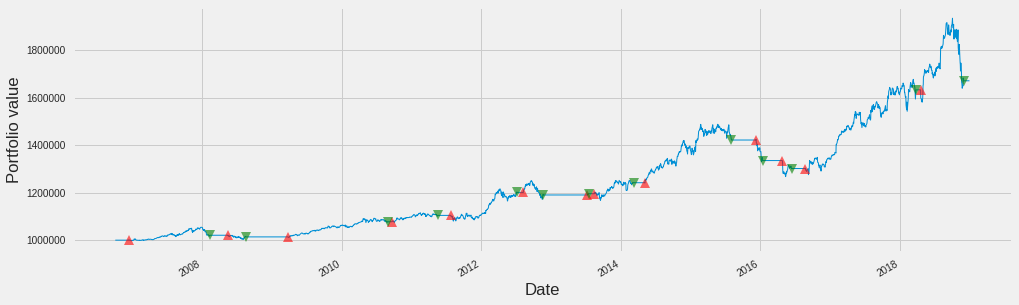

In [39]:
# Task 5.8 Visualize the portfolio value or over the years

# Create a figure
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(111, ylabel='Portfolio value')

# Plot the equity curve
aapl['Total'].plot(ax = ax1, linewidth = 1)

ax1.plot(aapl[aapl['Signal'] == 1].index, 
         aapl[aapl['Signal'] == 1.0]['Total'],
         '^', markersize = 10, color = 'r', alpha = 0.6)
ax1.plot(aapl[aapl['Signal'] == -1].index, 
         aapl[aapl['Signal'] == -1.0]['Total'],
         'v', markersize = 10, color = 'g', alpha = 0.6)

# Show the plot
plt.show()

In [40]:
# Task 5.9 Visualize the portfolio value or over the years

# Resample `aapl` to 12 months, take last observation as value 
yearly = aapl['Total'].resample('Y', convention='end').apply(lambda x: x[-1])
print(yearly)

Date
2006-12-31    9.993782e+05
2007-12-31    1.053544e+06
2008-12-31    1.013747e+06
2009-12-31    1.061992e+06
2010-12-31    1.096030e+06
2011-12-31    1.105070e+06
2012-12-31    1.190228e+06
2013-12-31    1.246162e+06
2014-12-31    1.379548e+06
2015-12-31    1.372496e+06
2016-12-31    1.339793e+06
2017-12-31    1.611923e+06
2018-12-31    1.671040e+06
Freq: A-DEC, Name: Total, dtype: float64


In [41]:
# Task 5.10 Calculate the yearly return
yearly.pct_change()

Date
2006-12-31         NaN
2007-12-31    0.054200
2008-12-31   -0.037775
2009-12-31    0.047590
2010-12-31    0.032051
2011-12-31    0.008248
2012-12-31    0.077061
2013-12-31    0.046994
2014-12-31    0.107038
2015-12-31   -0.005112
2016-12-31   -0.023827
2017-12-31    0.203113
2018-12-31    0.036675
Freq: A-DEC, Name: Total, dtype: float64

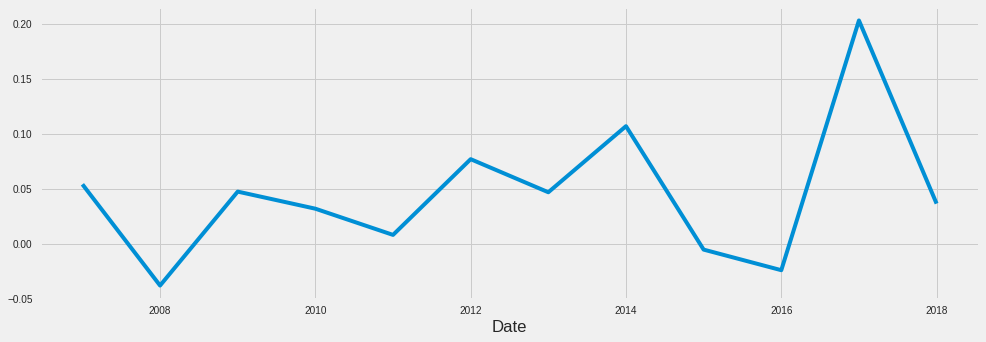

In [42]:
# Task 5.11 Plot the yearly return
yearly.pct_change().plot(figsize = (15,5))

In [0]:
# aapl['Total'].plot(figsize = (15,5), linewidth = 1, legend = True)
# googl['Total'].plot(figsize = (15,5), linewidth = 1, legend = True)
# ibm['Total'].plot(figsize = (15,5), linewidth = 1, legend = True)
# amzn['Total'].plot(figsize = (15,5), linewidth = 1, legend = True)
# plt.legend(['AAPL', 'GOOGL', 'IBM', 'AMZN'])
# plt.title('Portfolio Value')
# plt.show()